In [2]:
%matplotlib inline


In [3]:
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec 
plt.rcParams.update({'font.size': 15})


In [4]:
df=pd.read_excel("data/laser.ods",dtype=float)
df["I"]*=10**(df["nd"])
df["I2"]*=10**(df["nd2"])

In [5]:
sin_f = lambda beta,alpha,offset, amp: amp*np.sin((beta-alpha)/180*2*np.pi)+offset
popt,pcov = curve_fit(sin_f,df["angle"],df["I"],p0=[0,4000,3000])
fit_f= lambda beta:sin_f(beta,popt[0],popt[1],popt[2])

popt2,pcov2 = curve_fit(sin_f,df["angle2"][:18],df["I2"][:18],p0=[0,4000,3000])
fit_f2= lambda beta:sin_f(beta,popt2[0],popt2[1],popt2[2])

angles_arr=np.arange(0,181,1)
angles_arr2=np.arange(115,160,1)

In [6]:
imax=max(df["I"])
imin=min(df["I"])
plin=(imax-imin)/(imax+imin)

In [16]:
I0=popt[1]*2
eta=np.arccos(popt[2]/popt[1])/2*180/np.pi
err21=np.sqrt(pcov[2,2])/popt[1]+popt[2]/popt[1]**2*np.sqrt(pcov[1,1])
eta_err=1/np.sqrt(1-popt[2]/popt[1])/2*180/np.pi*err21

alpha=popt[0]+45
alpha_err=np.sqrt(pcov[0,0])
alpha2=popt2[0]+45
alpha2_err=np.sqrt(pcov2[0,0])
eta2=alpha2-alpha
eta2_err=alpha2_err+alpha_err

In [17]:
print(f"Der Linearisationsgerad beträgt {plin}")
print(f"eta ist in grad {eta} pm {eta_err}")
print(f"eta2 ist in grad {eta2} pm {eta2_err}")
print(f"alpha ist in grad {alpha} pm {alpha_err}")
print(f"alpha2 ist in grad {alpha2}")

Der Linearisationsgerad beträgt 0.9538968166849616
eta ist in grad 9.158519025079901 pm 1.1417488283244746
eta2 ist in grad 7.343223109134456 pm 0.2537081105796506
alpha ist in grad 49.82398615821384 pm 0.15355674171175696
alpha2 ist in grad 57.1672092673483


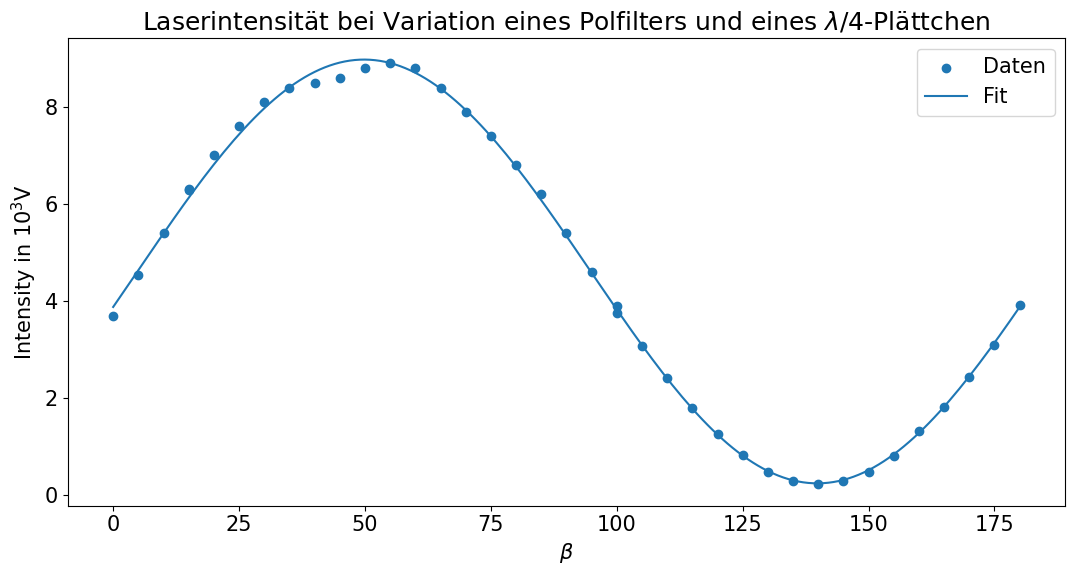

In [9]:
fig = plt.figure(figsize=(11, 6))
gs = GridSpec(8, 5)
fig1 = fig.add_subplot(gs[:, :])
fig1.set_title(f"Laserintensität bei Variation eines Polfilters und eines $\lambda/4$-Plättchen")
fig1.set_ylabel("Intensity in $10^3$V")
fig1.set_xlabel("$\\beta$")
# fig1.set_xlim(-5,185)
# fig1.set_ylim(0,10.5)
fig1.scatter(df["angle"],df["I"]*1e-3,label="Daten")
fig1.plot(angles_arr,fit_f(angles_arr)*1e-3,label="Fit")
# fig1.scatter(df["angle2"],df["I2"]*1e-3,label="Daten mit $\lambda/4$")
# fig1.plot(angles_arr2,fit_f2(angles_arr2)*1e-3,label="Fit mit $\lambda/4$")
plt.tight_layout()
plt.savefig(f"figures/laser_0.pdf")
plt.legend()
plt.show()

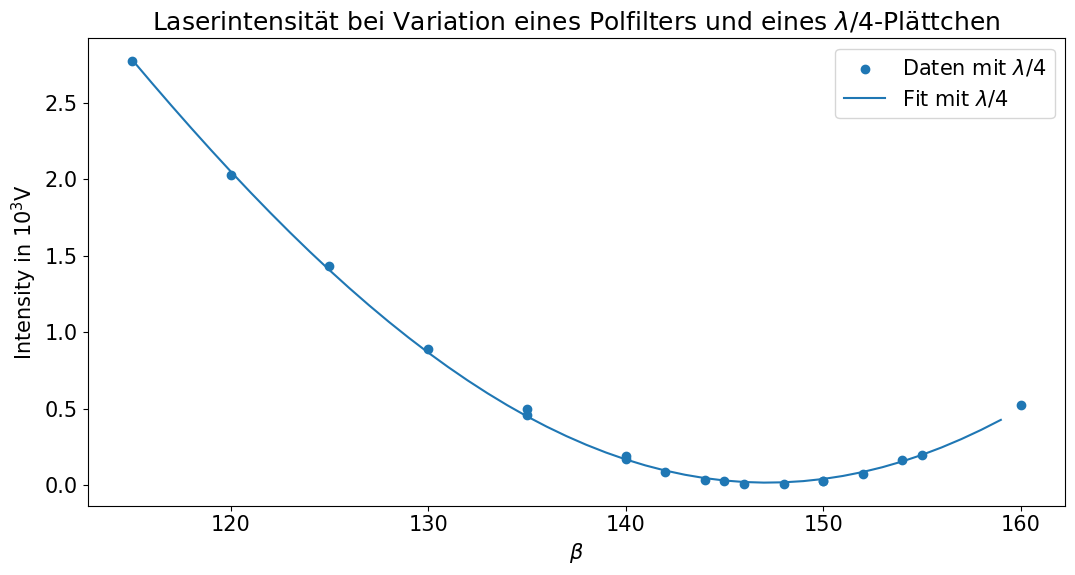

In [10]:
fig = plt.figure(figsize=(11, 6))
gs = GridSpec(8, 5)
fig1 = fig.add_subplot(gs[:, :])
fig1.set_title(f"Laserintensität bei Variation eines Polfilters und eines $\lambda/4$-Plättchen")
fig1.set_ylabel("Intensity in $10^3$V")
fig1.set_xlabel("$\\beta$")
# fig1.set_xlim(-5,185)
# fig1.set_ylim(0,10.5)
# fig1.scatter(df["angle"],df["I"]*1e-3,label="Daten")
# fig1.plot(angles_arr,fit_f(angles_arr)*1e-3,label="Fit")
fig1.scatter(df["angle2"],df["I2"]*1e-3,label="Daten mit $\lambda/4$")
fig1.plot(angles_arr2,fit_f2(angles_arr2)*1e-3,label="Fit mit $\lambda/4$")
plt.tight_layout()
plt.savefig(f"figures/laser_2.pdf")
plt.legend()
plt.show()

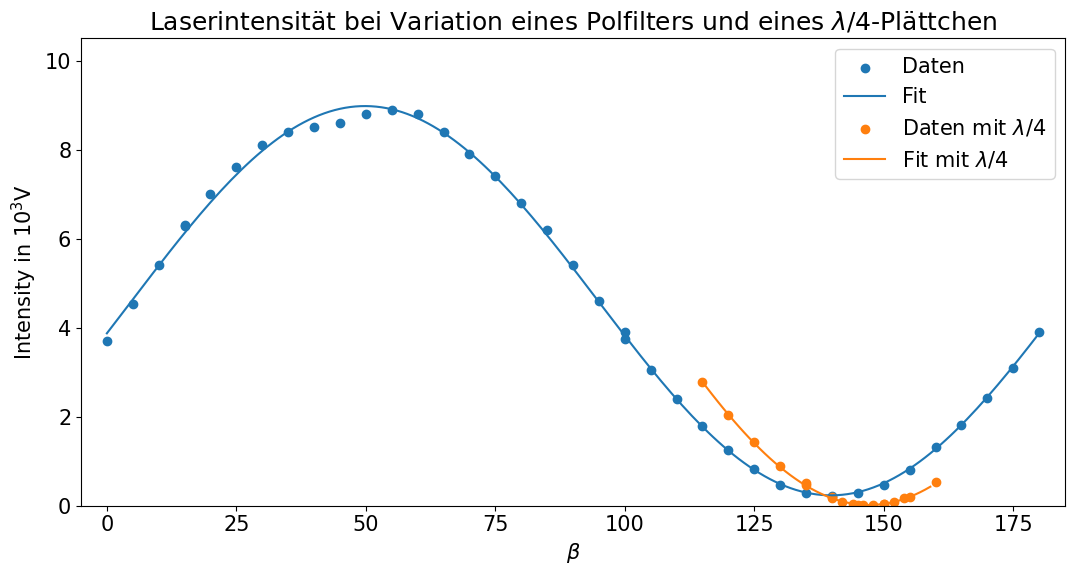

In [11]:
fig = plt.figure(figsize=(11, 6))
gs = GridSpec(8, 5)
fig1 = fig.add_subplot(gs[:, :])
fig1.set_title(f"Laserintensität bei Variation eines Polfilters und eines $\lambda/4$-Plättchen")
fig1.set_ylabel("Intensity in $10^3$V")
fig1.set_xlabel("$\\beta$")
fig1.set_xlim(-5,185)
fig1.set_ylim(0,10.5)
fig1.scatter(df["angle"],df["I"]*1e-3,label="Daten")
fig1.plot(angles_arr,fit_f(angles_arr)*1e-3,label="Fit")
fig1.scatter(df["angle2"],df["I2"]*1e-3,label="Daten mit $\lambda/4$")
fig1.plot(angles_arr2,fit_f2(angles_arr2)*1e-3,label="Fit mit $\lambda/4$")
plt.tight_layout()
plt.savefig(f"figures/laser_3.pdf")
plt.legend()
plt.show()